In [3]:
import numpy as np
import pandas as pd
import seaborn as sns


In [10]:
import sklearn.datasets as datasets
boston = datasets.load_boston()
boston_df = pd.DataFrame(data=boston.data,columns=boston.feature_names)

/Users/zhuhe/miniforge3/envs/python_spring02/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(boston_df,boston.target,test_size=0.3)



In [19]:

#用lasso回归进predict预测
from sklearn.linear_model import Lasso , LassoCV
alphas = np.logspace(-10,10,200)
NET  = LassoCV(alphas= alphas).fit(x_train,y_train)
#为什么这个拟合效果这么差劲？
print(NET.alpha_)

#这个默认选取一个最好的？
net = Lasso(alpha=NET.alpha_).fit(x_train,y_train)
r2 = NET.score(x_test,y_test)
r = net.score(x_test,y_test)
r






0.008703591361485167


0.7478015292019125

In [16]:
coef = pd.DataFrame()
for alpha in alphas:
   clf = Lasso(alpha = alpha)
   clf.fit(x_train,y_train)
   df = pd.DataFrame([clf.coef_],columns=boston.feature_names)
   df['alphas'] = alpha
   coef = coef.append(df,ignore_index=True)

/var/folders/7k/t3z5gl690gx4ks2wtmpnj4x40000gn/T/ipykernel_8002/3779000489.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef = coef.append(df,ignore_index=True)
/var/folders/7k/t3z5gl690gx4ks2wtmpnj4x40000gn/T/ipykernel_8002/3779000489.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef = coef.append(df,ignore_index=True)
/var/folders/7k/t3z5gl690gx4ks2wtmpnj4x40000gn/T/ipykernel_8002/3779000489.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef = coef.append(df,ignore_index=True)
/var/folders/7k/t3z5gl690gx4ks2wtmpnj4x40000gn/T/ipykernel_8002/3779000489.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef = coef.a

In [13]:
coef.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,alphas
0,-0.104246,0.048902,0.017444,1.046573,-18.002285,3.862422,-0.011674,-1.690273,0.319581,-0.013714,-0.921798,0.008406,-0.484853,1.000000e-10
1,-0.104246,0.048902,0.017444,1.046573,-18.002285,3.862422,-0.011674,-1.690273,0.319581,-0.013714,-0.921798,0.008406,-0.484853,1.260383e-10
2,-0.104246,0.048902,0.017444,1.046573,-18.002285,3.862422,-0.011674,-1.690273,0.319581,-0.013714,-0.921798,0.008406,-0.484853,1.588565e-10
3,-0.104246,0.048902,0.017444,1.046573,-18.002285,3.862422,-0.011674,-1.690273,0.319581,-0.013714,-0.921798,0.008406,-0.484853,2.002200e-10
4,-0.104246,0.048902,0.017444,1.046573,-18.002285,3.862422,-0.011674,-1.690273,0.319581,-0.013714,-0.921798,0.008406,-0.484853,2.523539e-10


<AxesSubplot:>

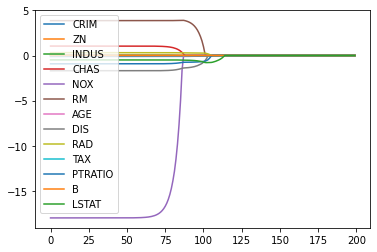

In [14]:
#岭极图
coef.iloc[:,:-1].plot()


#总结省略了